## Exploratory Data Analysis

In [280]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

In [7]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

In [8]:
df.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | Worst experience ever. Outbound...,5,2022-11-07,Italy,False,verified worst experience ever outbound flight...
1,✅ Trip Verified | Check in was a shambles at ...,1,2022-11-07,Malaysia,True,check shamble bwi counter open full flight bag...
2,✅ Trip Verified | Beyond disgusted with the fa...,5,2022-11-05,United Arab Emirates,True,beyond disgusted fact baggage yet delivered we...
3,✅ Trip Verified | On July 19th 2022 I had subm...,1,2022-10-31,United States,True,july th submitted complaint form regard fact b...
4,✅ Trip Verified | I booked the flight on Oct ...,1,2022-10-31,United States,True,booked flight oct cancel flight day learning g...


#### What is the average overall rating given for British Airways?

In [11]:
df.stars.mean()

4.841102316036353

#### What is the total counts for each ratings?


Text(0.5, 0.98, 'Counts for each ratings')

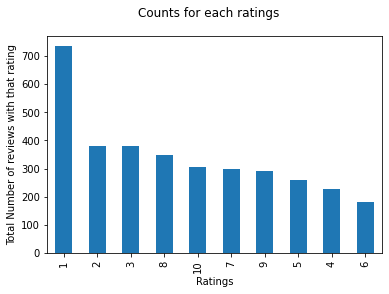

In [21]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [149]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [169]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [170]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [171]:
df_ratings

,Stars,total_counts,pct_values
0,1,735,21.55
1,2,382,11.20
2,3,379,11.11
3,8,349,10.23
4,10,306,8.97
5,7,299,8.77
6,9,293,8.59
7,5,259,7.59
8,4,227,6.65
9,6,182,5.34


Text(0.5, 1.0, 'Counts for each ratings')

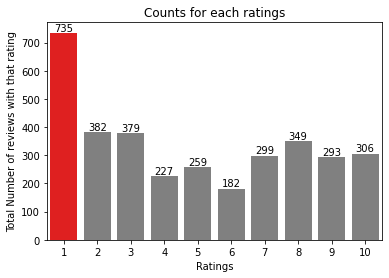

In [215]:

clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")


#### Which country most review comes from?  

In [237]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [238]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

In [239]:
df_country_review

,country,total_reviews
0,United Kingdom,2176
1,United States,351
2,Australia,151
3,Canada,103
4,Germany,59


#### Which country provided on average highest ratings?

In [242]:

df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

In [246]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)


Text(0.5, 1.0, 'Country with avg highest rating provided to British Airways')

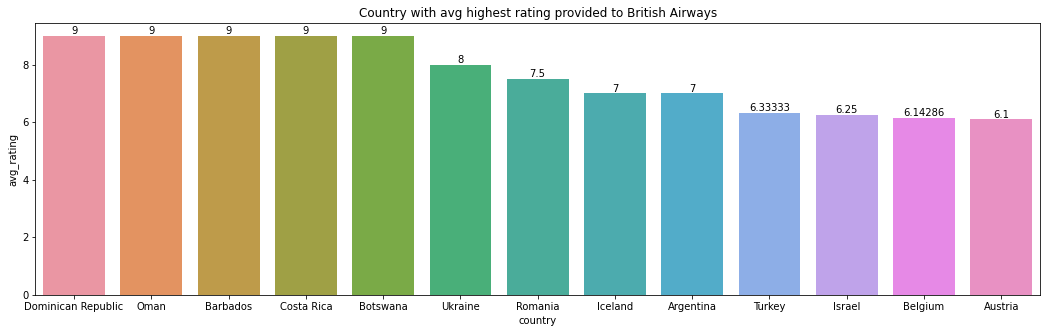

In [273]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:13])
ax.bar_label(ax.containers[0])
ax.set_title("Country with avg highest rating provided to British Airways")

#### Time Series Analysis

In [284]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

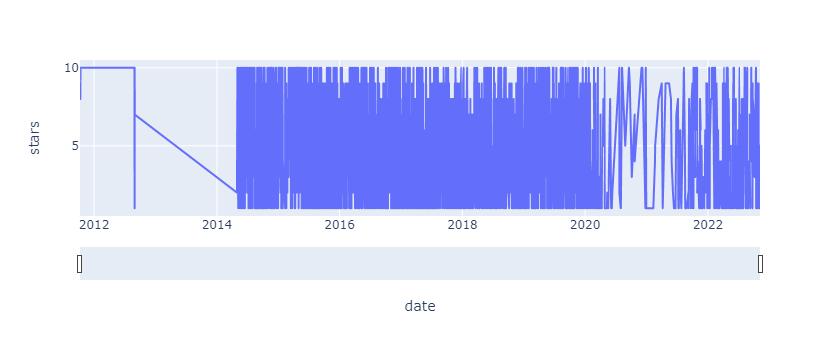

In [290]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. 